# Type 1 and Type 2 errors

## Introduction

In hypothesis testing, you are performing statistic tests to determine whether you believe a statement to be true or false. This initial statement you are testing is called the **null hypothesis**. One common example of this is whether you believe two populations to be statistically different from one another. For example, you might be interested in testing if a new website layout is more effective at getting customers to make a purchase. in order to determine if the new layout was indeed effective, you would compare statistics, such as the average number of purchases in a given day, before and after the change.

There are times, however, when researchers reject the null hypothesis when they should have not rejected it. The opposite might happen as well, where you might fail to reject the null hypothesis when it should have been rejected. Data Scientists refer to these errors as Type 1 and Type 2 errors respectively, and you will soon dive into each one in more detail.


## Objectives

You will be able to:

* Explain why alpha = 0.05 is chosen as the cut off point for rejecting Null hypothesis in most scientific experiments
* Simulate Type I and Type II errors with alpha control to observe the output of an experiment
* Describe and differentiate between TYPE I and TYPE II errors
* Understand alpha and beta for representing false positive and false negative values

## Alpha and Type 1 Errors

When conducting hypothesis testing, there will almost always be the chance of accidentally rejecting a null hypothesis when it should not have been rejected. Data scientists have the ability to choose a confidence level, alpha ($\alpha$) that they will use as the threshold for accepting or rejecting the null hypothesis. This confidence level is also the probability that you reject the null hypothesis when it is actually true. This scenario is a Type 1 error, more commonly known as a **False Positive**. 

Here is a scenario that will better explain how a Type 1 error might occur:

Say that you flipped a coin 30 times and get a total of 23 heads. The first thought in your head is, is this a fair coin? With that you can create the following null hypothesis:

**Null Hypothesis:** This coin is fair.

**Alternative Hypothesis:** This coin is not fair.

Or expressed mathematically:

$H_{0} : \mu = 0.5 $

$H_{1} : \mu \neq 0.5$

The null hypothesis is assumed to be true unless there is overwhelming evidence to the contrary. To quantify this you must determine what level of confidence for which you will reject the null hypothesis. If a researcher was to set **alpha ($\alpha$) = .05**, this indicates that there is a 5% chance that you will reject the null hypothesis when it is actually true. Another way to think about this is that if you repeated this experiment 20 times, you would expect to see a the hypothesis rejected, purely by chance, one time. The threshold for alpha varies significantly depending on your scientific disciplines. Physics, for example, often require that findings are significant to the an alpha level of 0.0000003 or, in other words, one would expect results to occur by chance at most one out of 3.5 million trials! For most other disciplines, an $\alpha$ level of 0.05 is enough to prove some results are statistically significant.



## Beta and Type 2 Errors
Another type of error is beta ($\beta$), which is the probability that you fail to reject the null hypothesis when it is actually false. Type 2 errors are also referred to as **False Negatives**. Beta is related to something called _Power_, which is the probability of rejecting the null hypothesis given that it actually is false. Mathematically, _Power_ = 1 - $\beta$. When designing an experiment, scientists will frequently choose a power level they want for an experiment and from that obtain their Type 2 error rate.


## Balancing Type 1 and Type II Errors Examples   
Different scenarios call for scientists to minimize one type of error over another. The two error types are inversely related to one other; reducing type 1 errors will increase type 2 errors and vice versa. Let's go through some different real-life scenarios to determine when it would be better to have a Type 1 or Type 2 error. Imagine you are on a jury and need to decide if someone will be sent to prison for life for a crime. Given that you don't know the truth of whether or not this individual committed a crime, which would be worse, a Type 1 or a Type 2 error here?

* $H_{0} : defendant = innocent $ 

* $H_{1} : defendant \neq innocent$

<img src="./images/jury.jpeg">

Hopefully you said a Type 1 error would be worse! A Type 1 error would mean that you would send someone to jail when they were truly not guilty! In other words, the jury has rejected the null hypothesis that the defendant is innocent, even though he has not committed any crime. Of course, you would also not want to have a Type 2 error because this would mean that someone actually has committed a crime, and the jury is letting them get away with it.

Let's take a look at an example of a medical scenario. A patient with symptoms of a consistent headache goes to a doctor's office and gets an MRI scan of their head because the doctor suspects the patient might have a brain tumor. Would it be worse to have a Type 1 or Type 2 error in this scenario?

* $H_{0} : patient = healthy $ 

* $H_{1} : patient \neq healthy$


<img src="./images/doctor.jpg" style="width: 280px;"/>

Hopefully you said a Type 2 error would be worse! A Type 2 error would mean that the patient actually has a brain tumor, but the doctor claims there is nothing wrong with them. In other words, the null hypothesis is that the person has no brain tumor, and this hypothesis fails to be rejected, meaning the person is diagnosed as healthy when in actuality, they are far from it.

When scientists are designing experiments, they need to weigh the risks of Type 1 and Type 2 errors and make decisions about choosing alpha level and power, which you will cover in more detail soon, to optimize for whichever type of error they want to minimize. 

## Testing an Unfair Coin

In [1]:
import numpy as np
import scipy

Here you'll simulate an unfair coin with 75% chance of heads and 25% chance of tails. You'll then *flip* this coin 20 times and perform a test to determine whether you believe it to be fair or unfair.

In [2]:
n = 20 #Number of flips
p = .75 #Simulating an unfair coin
coin1 = np.random.binomial(n, p)
coin1

15

In this case, you know the theoretical mean and standard deviation of a fair coin; it can be modeled by a binomial distribution with p = 0.5. In future cases, you'll often use a t-test (as you've already previewed) in order to compare samples, but don't know the overall population statistics.

The standard deviation of a binomial distribution is given by:  

$\sigma = \sqrt{n \bullet p \bullet (1-p)}$

So you would expect that for a sample of 20 elements, the standard deviation from the expected number of heads (10) for a fair coin should be:

In [9]:
sigma = np.sqrt(n*.5*(1-.5))
sigma

2.23606797749979

And with that you can now calculate a p-value using a traditional z-test:

### $ z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$

Here, $\bar{x}$ is the number of heads, $\mu$ (mu) is the expected number of heads (10), $\sigma$ (sigma) is the standard deviation (calculated above) and n is the number of observations (20).

In [10]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

10.0

In [11]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

10.0

Finally, you can take your z-score and apply standard lookup tables based on your knowledge of the normal distribution to determine the probability 

In [12]:
import scipy.stats as st

In [13]:
st.norm.sf(np.abs(z))

7.61985302416047e-24

This is an absolutely tiny p-value, meaning that you can reject the null hypothesis *this coin is fair* and conclude that the coin is unfair!

Here is a demonstration of how the average p-values change as the size of the sample increases.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Text(0.5, 0, 'Number of Coin Flips')

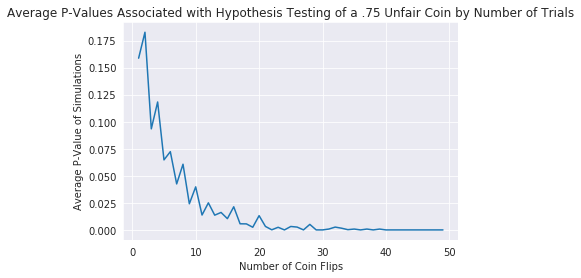

In [15]:
#How many times would you have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 # Simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')

## Summary

Great! You now know what type 1 and type 2 errors are. Let's go and practice your knowledge!